# Feature Selection and Feature Engineering

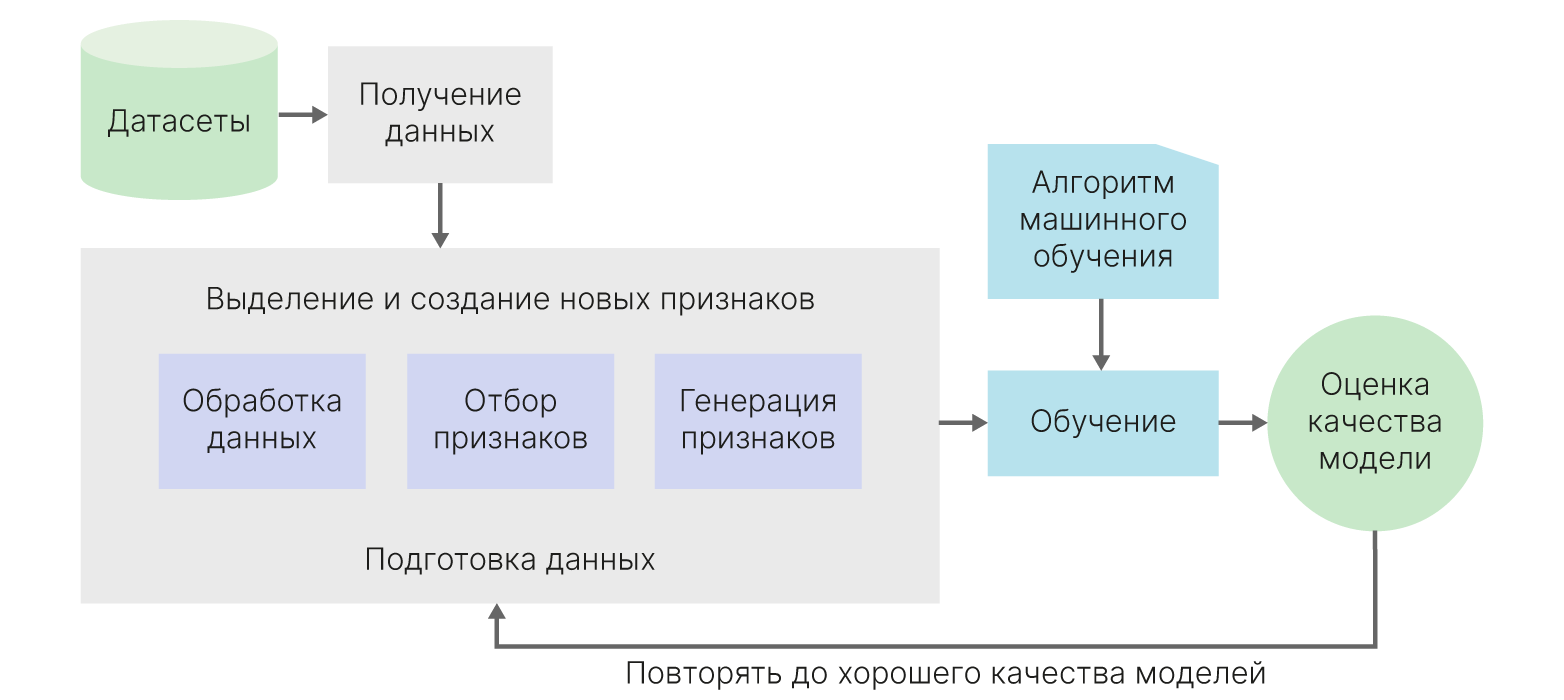

**Feature Engineering** - процесс придумывания способов описания данных с помощью простых значений, которые должны отражать характеристики объектов исследований, через которые выражаются целевые значения 

Изначально объекты в нашем датасете могут быть представлены в виде описаний, которые не являются признаковыми, либо, очевидно, требует некоторой предобработки:

    веб-страницы
    файлы
    ссылки на участников группы
    измерения в разных единицах (см, м, дц) и т.д

Большая часть моделей неспособна работать с такими представлениями в сыром виде и или просто не запустится, либо будет выдавать неадекватные результаты


Процесс создания признаков зависит от модели, которую мы собираемся использовать. Для одних моделей полезно добавить признаки, полученные делением/перемножением исходных. Другие модели могут провести эти операции сами и экономнее/менее переобучаясь. Как вариант, добавление признаков, явно зависящих от друг друга может даже мешать некоторым моделям.

Например, плохая идея добавлять в обычную линейную модель как признаки X1 и X2, так и их сумму.

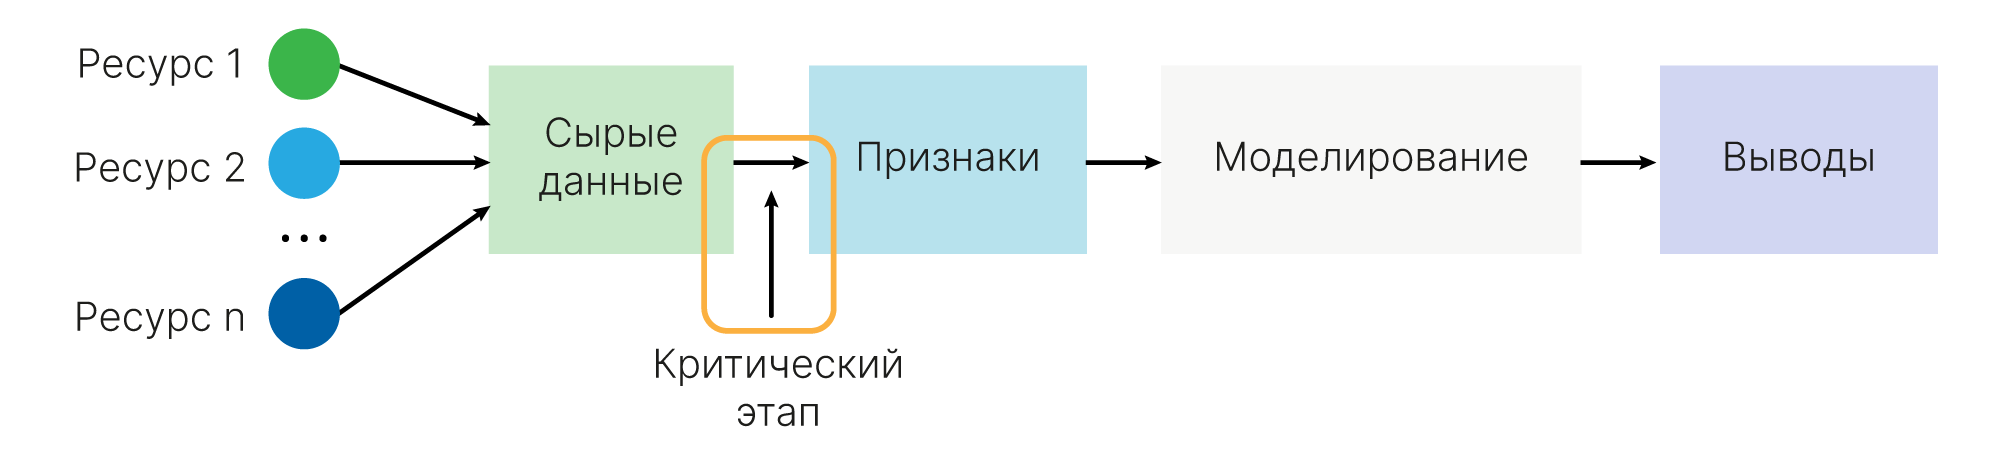

Вообще говоря, надо понимать, что процесс feature engneering является критическим местом, bottleneck, в машинном обучении. Все, что ваша модель будет знать о данных решается на этом этапе. Больше, чем вы ей дадите - она не узнает.

Если вы в данных дадите явную подсказку об ответе - то она будет использовать эту подсказку, а реальные закономерности может и не выучить. К примеру, можно дать ей в качестве признака id покупателя, который каждую неделю покупает одно и то же. Если таких ситуаций будет много, то она и выучит, что надо предсказывать все по id. Когда же к вам придет новый покупатель или у старого, что-то поменяется в поведении, модель начнет вести себя неадекватно.

Точно такую же роль может сыграть информация о номере эксперимента, лаборатории, в которой его проводили, аспиранте, который его проводил и тд.

Такая ситуация будет называться data leakage.

Ну и понятно, что если вы дадите модели только нерелевантную информацию, она ничего из нее не вытащит. 

#### Преобразования вещественных признаков
1. Бинаризация

Например, нам может быть не интересно, сколько конкретно раз встретилось явление в наблюдении - главное, что оно вообще встретилось. Тогда мы просто превращаем наш вещественный признак в бинарный "было ли явление", и работаем уже с ним.

2. Округление

Часто данные до нас доходят с очень высокой точностью после запятой. Нужно ли это нашей модели - часто нет. Иногда по факту два наблюдения не различаются по этому признаку (разница в пределах статошибки), но по признаку их отличить можно. Это может приводить к переобучению. В таких случаях разумно признаки округлить.

3. Bining (Бинирование)

Опять же, нам не интересны точные значения - например, что видео набрало 1000 лайков, а не 1001.

К тому же, число просмотров/лайков некоторых видео может быть очень большим в сравнении с остальными, что будет приводить к неадекватному поведению. В итоге часть значений у нас встречается часто, а часть - очень редко. Это может приводить к неадекватному поведению модели.
 
 -- Fixed-width bining - просто бьем наши значения по диапазонам фиксированной длины. Так часто поступают с возрастом.
 
 -- Adaptive Binning - бинирование, например, по квантилям - когда границы бина представляют собой квантили.

4. Логарифмирование

С ситуацией, когда распределено скошено вправо работает и другой подход - прологаримфировать величину.

Обобщением этого подхода явлется Box-Cox Transform, общей целью которой является придать данным вид более похожий на нормальнео распределение, с которым работает бОльшее число моделей и сходимость лучше


**Преобразование категориальных признаков**

1.  Label encoding

Просто берем и каждой категории однозначно сопоставляем число. Очень простой способ, если признак ординальный - будет работать почти всегда.

Если же наш признак - номинальный, то могут возникнуть проблемы. Мы не можем сказать, что салатовый больше красного (в большинстве случаев). Но модель ничего про это не знает и после нашего кодирования спокойно такие сравнения может производить. Это может приводить к более низкому качеству модели и выучиванию ею неправильной информации. Кроме того, например, деревьям решений , чтобы выделить в таком случае конкретную категорию придется делать сразу несколько действий, которые, в силу жадности алгоритма их построения, могут и не быть найдены

Некоторые модели (например, lightgbm) автоматически могут перекодировать все правильно, если им сообщить, что переданный признак - категориальный. Для некоторых это придется делать вручную.

2. One-hot encoding

Схемой, которая часто используется на практике, является one-hot encoding. Он состоит том, что вместо одного категориального признака X создается набор бинарных категориальных признаков, которые отвечают на вопрос "X == C? ", где C пробегает все возможные значения категориального признака.

Теперь чтобы обусловиться на конкретное значение категориального признака, дереву решений достаточно задать один вопрос.
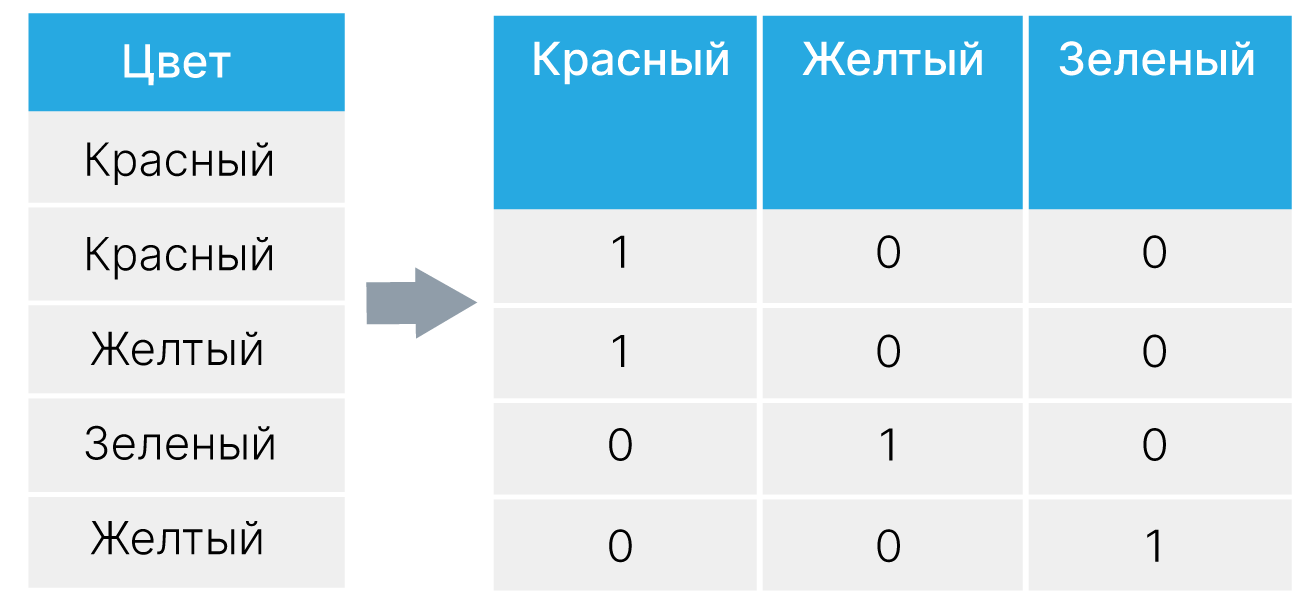

3. Target encoding

Кодируем каждую категорию каким-то численным параметром, характеризующим то, что мы предсказываем. Например, можно каждую категорию категориального признака заменять на среднее

На самом деле, так просто делать нельзя, можно получить переобученную модель. Как делать - можете подробно посмотреть, к примеру, здесь или здесь

4. Embedding

Можно научить вашу модель саму сопоставлять каждой категории некий вектор определенной размерности. Для этого вначале сопоставляем каждой категории случайный вектор заданной длины. А далее изменяем этот вектор как обычные веса.
Кодирование циклических категориальных признаков

В случае с такими признаками, как день недели или время суток, мы сталкиваемся с проблемой того, что нам нужно предложить кодирование, которое будет учитывать, что понедельник близок к воскресенью так же, как понедельник же ко вторнику, и тд.

В случае деревьев решений и методов на них основанных можно "забить" - такие методы сами разберутся. Для некоторых других методов, тех же нейросетей, правильно кодирование может улучшить качество и сходимость. 
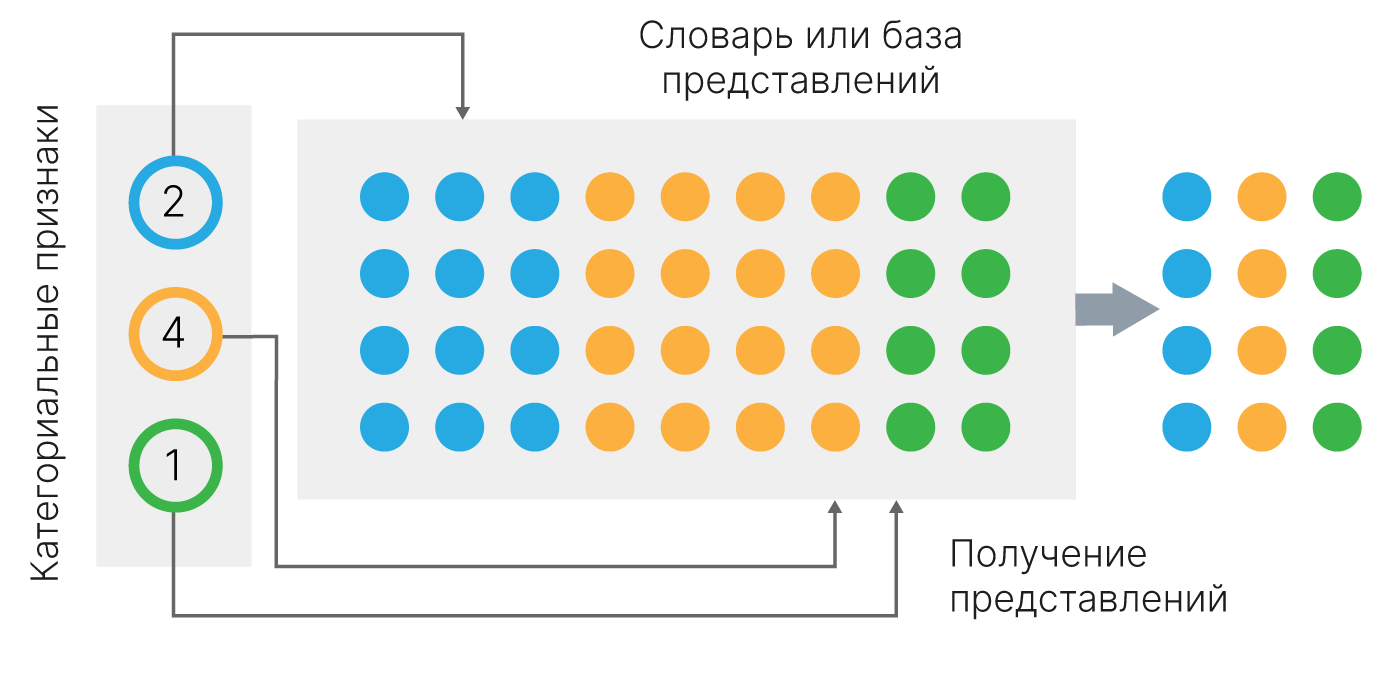

### Хорошие источники 

1. [Feature Selection for High-Dimensional Data](https://www.springer.com/gp/book/9783319218571)
2. [How to Win a Data Science Competition: Learn from Top Kagglers](https://www.coursera.org/learn/competitive-data-science)
3. **Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists Paperback** – April 14, 2018 by Alice Zheng , Amanda Casar
4. [Сайт](https://dyakonov.org/) и [курс](https://github.com/Dyakonov/PZAD) Дьяконова
5. Серия статей на towardsdatascience, [первая из серии](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)
6. [A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
7. [Про кодирование циклических признаков](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html)

### sklearn.preprocessing

Для целей предварительной обработки признаков существует множество инструментов, в том числе модуль preprocessing в пакете sklearn.

Аналогичные подмодули или целые библиотеки есть и для разных задач, связанных с нейронными сетями (torchvision, torchaudio и прочее)

In [4]:
! wget https://raw.githubusercontent.com/brinkar/real-world-machine-learning/master/data/titanic.csv

import pandas as pd
import numpy as np
data = pd.read_csv("titanic.csv")
data[:5]

--2022-03-16 20:09:55--  https://raw.githubusercontent.com/brinkar/real-world-machine-learning/master/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  59,76K  --.-KB/s    in 0,001s  

2022-03-16 20:09:56 (68,2 MB/s) - ‘titanic.csv.3’ saved [61194/61194]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [63]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(sparse=False,
                   handle_unknown='ignore'),
     make_column_selector(dtype_include='category')),
    remainder='passthrough')

In [64]:
features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"],
                     axis=1)

features['Cabin'] = data['Cabin'].fillna("X").apply(lambda x: x[0]).astype("category")

def get_cab_num(cab):
    try:
        return int(cab.split()[0][1:])
    except:
        return -1 
features['Cabin_num'] = data['Cabin'].fillna("X").apply(lambda x: get_cab_num(x))

features['N_cabins'] = data['Cabin'].fillna("X").str.split(" ").apply(lambda x: len(x))

features['Sex'] = data['Sex'].astype("category")

features['Embarked'] = data['Embarked'].fillna("X").astype("category")
features['sqrt_Fare'] = np.sqrt(data['Fare'])
features['Age'] = data['Age'].fillna(-1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, data["Survived"], test_size=0.2, random_state=42)

In [66]:
one_hot_encoder.fit(X_train)
X_train = one_hot_encoder.transform(X_train)
X_test = one_hot_encoder.transform(X_test)

In [68]:
X_train

array([[  0.        ,   0.        ,   1.        , ..., 124.        ,
          1.        ,   5.33853913],
       [  0.        ,   0.        ,   0.        , ...,  -1.        ,
          1.        ,   3.60555128],
       [  0.        ,   0.        ,   0.        , ...,  -1.        ,
          1.        ,   2.81513765],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  -1.        ,
          1.        ,   3.7561017 ],
       [  0.        ,   1.        ,   0.        , ...,  96.        ,
          2.        ,  10.95445115],
       [  0.        ,   0.        ,   0.        , ...,  26.        ,
          1.        ,   8.79133096]])

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# Make predictions
print(model.score(X_test,y_test))

0.7821229050279329


## **Feature selection**

- **Отбор признаков** или **выбор переменных** - это процесс выбора подмножества релевантных признаков или переменных из общего числа признаков в наборе данных для построения алгоритмов машинного обучения. 


## **Преимущества отбора признаков**.

  1.	Повышение точности
  2.    Простые модели легче интерпретировать.
  3.	Более короткое время обучения
  4.	Улучшенная обобщенность за счет уменьшения избыточной подгонки
  5.	Более простая реализация разработчиками программного обеспечения
  6.	Снижение риска ошибок в данных при использовании модели
  7.	Избыточность переменных
  8.	Плохое поведение обучения в пространствах высокой размерности


## **Feature Selection – методы**

  1.    Filter methods
  2.	Wrapper methods
  3.	Embedded methods
  
  
## **Filter Methods**

  1.    Basic methods
  2.    Univariate methods
  3.    Information gain
  4.    Fischer score
  5.    Correlation Matrix with Heatmap
  
  
## **Wrapper Methods**


  1.    Forward Selection
  2.    Backward Elimination
  3.    Exhaustive Feature Selection
  4.    Recursive Feature Elimination
  5.    Recursive Feature Elimination with Cross-Validation
  
  
  
## **Embedded Methods**

  1.   LASSO
  2.   RIDGE
  3.   Tree Importance
  


# **2. Filter Methods**


- Методы фильтрации обычно используются в качестве этапа предварительной обработки. Выбор признаков не зависит от алгоритмов машинного обучения. Вместо этого признаки выбираются на основе их оценок в различных статистических тестах на корреляцию с итоговой переменной. Характеристики этих методов следующие:-

  - Эти методы опираются на характеристики данных (характеристики признаков).
  - Они не используют алгоритмы машинного обучения.
  - Они не зависят от модели.
  - Они, как правило, менее затратные в вычислительном плане.
  - Обычно они дают более низкую эффективность прогнозирования, чем методы-обертки.
  - Они очень хорошо подходят для быстрого отбора и удаления нерелевантных характеристик.
  
  
 - Методы фильтрации состоят из различных приемов, приведенных ниже:-

- 2.1.    Basic methods
- 2.2.    Univariate feature selection
- 2.3.    Information gain
- 2.4.    Fischer score
- 2.5.    ANOVA F-Value for Feature Selection
- 2.6.    Correlation Matrix with Heatmap   
  
Методы фильтрации можно пояснить с помощью следующего графика:

![FilterMethods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)

## **2.1 Basic methods** 

## **2.1.1 Remove constant features** 

- Постоянные признаки - это признаки, которые показывают одно и то же значение, только одно значение, для всех наблюдений набора данных. То есть, одно и то же значение для всех строк набора данных. Эти признаки не предоставляют никакой информации, которая позволяет модели машинного обучения различать или предсказывать цель.

- Выявление и удаление постоянных признаков - это простой первый шаг на пути к выбору признаков и созданию более легко интерпретируемых моделей машинного обучения. Чтобы определить постоянные признаки, мы можем использовать функцию VarianceThreshold из sklearn.

In [14]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подгрузим данные, которых будет много и они будут разные для разных целей
import os
for dirname, _, filenames in os.walk('input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Список наших данных.


input/mushrooms.csv
input/customers/sample_submission.csv
input/customers/train.csv
input/customers/test.csv
input/house_price/sample_submission.csv
input/house_price/train.csv
input/house_price/data_description.txt
input/house_price/test.csv


In [35]:
# очень не хочется читать много предупреждений - поэтому мы их уберем.
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Загрузим данные. В этих данных 

X_train = pd.read_csv('input/customers/train.csv', nrows=35000)
X_test = pd.read_csv('input/customers/test.csv', nrows=15000)

X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [57]:
y_train = X_train['TARGET']
y_train

0        0
1        0
2        0
3        0
4        0
        ..
34995    1
34996    0
34997    0
34998    0
34999    0
Name: TARGET, Length: 35000, dtype: int64

In [58]:
# уберем переменную TARGET, чтобы можно было её предсказывать


X_train.drop(labels=['TARGET'], axis=1, inplace = True)


# На всякий случай проверим размерность наших датасетов

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

### **NB!!**

Во всех процедурах отбора признаков хорошей практикой является отбор признаков путем изучения только обучающего набора. Это делается для того, чтобы избежать чрезмерного переобучения.

### **Using variance threshold from sklearn**

- Variance threshold из sklearn - это простой базовый подход к отбору признаков. Он удаляет все признаки, дисперсия которых не соответствует некоторому порогу. По умолчанию он удаляет все признаки с нулевой дисперсией, т.е. признаки, которые имеют одинаковое значение во всех выборках.

In [38]:
# применим эту функцию на практике
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # найти все переменные с нулевой дисперсией

VarianceThreshold(threshold=0)

In [39]:
# get_support - это булевый вектор, который указывает, какие признаки сохраняются.
# если мы просуммируем get_support, то получим количество функций, которые не являются постоянными
sum(sel.get_support())

319

In [40]:
# ну или по другому можно:
len(X_train.columns[sel.get_support()])

319

In [41]:
# давайте выведем все фичи с нулевой дисперсией
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

- Мы видим, что существует 51 столбец / переменная, которые являются постоянными. Это означает, что 51 переменная показывает одно и то же значение, только одно значение, для всех наблюдений обучающего набора.

- Затем мы используем функцию преобразования для удаления этих данных из обучающего и тестового наборов.

In [42]:
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

In [61]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)



In [13]:
# проверим, что у нас получилось

X_train.shape, X_test.shape

((35000, 319), (15000, 319))

## **2.1.2 Удаление quasi-constant features**

- Квазиконстантные признаки - это признаки, которые показывают одно и то же значение для подавляющего большинства наблюдений в наборе данных. В целом, эти признаки дают мало информации, если вообще дают, которая позволяет модели машинного обучения различать или предсказывать цель. Но могут быть и исключения. Поэтому мы должны быть осторожны при удалении такого типа признаков. Определение и удаление квазиконстантных признаков - это простой первый шаг на пути к выбору признаков и более легко интерпретируемым моделям машинного обучения.

- Чтобы определить квазиконстантные признаки, мы можем снова использовать функцию VarianceThreshold из sklearn.

In [14]:
# Возмем данные

X_train = pd.read_csv('input/customers/train.csv', nrows=35000)
X_test = pd.read_csv('input/customers/test.csv', nrows=15000)

X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
# Уберем целевую перемнную из датасета

X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [16]:
# Проверим размер

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

### **Удаление quasi-constant features**

#### **Использование пороговой дисперсии из sklearn**.

- Variance threshold из sklearn - это простой базовый подход к отбору признаков. Он удаляет все признаки, дисперсия которых не соответствует некоторому порогу. По умолчанию он удаляет все признаки с нулевой дисперсией, т.е. признаки, которые имеют одинаковое значение во всех выборках.

- Давайте изменим порог по умолчанию, чтобы удалить почти / квазипостоянные признаки.

In [17]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [18]:
# Вновь возмем и посмотрим, скольк осталось признаков
sum(sel.get_support())
len(X_train.columns[sel.get_support()])

263

In [19]:
# Давайте посмотрим, какие фичи мы убрали:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

- Мы видим, что 107 столбцов / переменных практически неизменны. Это означает, что 107 переменных показывают преимущественно одно значение для ~99% наблюдений обучающего множества.

In [20]:
# А что же у нас спрятано в данных:
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.996286
1    0.003714
Name: ind_var31, dtype: float64

- Мы видим, что > 99% наблюдений показывают одно значение - 0. Следовательно, эта характеристика практически постоянна.

In [21]:
# удаяем эти данные
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# смотрим на наши данные:
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

- Удалив постоянные и квазипостоянные признаки, мы сократили пространство признаков с 370 до 263. Мы видим, что из данного набора данных было удалено более 100 признаков.

## **2.2 Univariate selection methods** 

- Методы выбора одномерных признаков работают путем выбора лучших признаков на основе одномерных статистических тестов, таких как ANOVA. Его можно рассматривать как шаг предварительной обработки для оценки важности признаков. 

- Методы, основанные на F-тесте, оценивают степень линейной зависимости между двумя случайными величинами. Они предполагают линейную зависимость между двумя перемнными Эти методы также предполагают, что переменные имеют гауссовское распределение.

- Существует 4 метода, которые относятся к этой категории :-.

  1. SelectKBest
  2. SelectPercentile
  3. SelectFpr, SelectFdr
  4. GenericUnivariateSelection


## **2.2.1 SelectKBest**

- Этот метод выбирает признаки в соответствии с k самыми высокими оценками.

- Например, мы можем провести тест хи-квадрат для образцов, чтобы извлечь только две лучшие характеристики из набора данных следующим образом:

In [22]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [23]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

Отобрали 2 лучших признака из данных по ирисам

## **2.2.2 SelectPercentile**


- Выберите характеристики в соответствии с перцентилем самых высоких оценок.

In [26]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape


(1797, 64)

In [27]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

- Мы видим, что только 7 характеристик находятся в первой десятке процентиля, и поэтому мы выбираем их соответствующим образом.

## **Important information**

- Эти объекты принимают на вход скоринговую функцию, которая возвращает одномерные оценки и p-значения (или только оценки для [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) и [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)):


- Для задач регрессии: [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression).

- Для задач классификации: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), 
[f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif).

Методы, основанные на F-тесте, оценивают степень линейной зависимости между двумя случайными величинами. С другой стороны, методы взаимной информации могут отражать любой вид статистической зависимости, но, будучи непараметрическими, они требуют большего количества выборок для точной оценки.

## **Выбор признаков с разреженными данными**

- Если вы используете разреженные данные (т.е. данные, представленные в виде разреженных матриц), [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) будут работать с данными, не делая их "плотными".

## **NB**
- Остерегайтесь не использовать функцию оценки регрессии с задачей классификации, вы получите бесполезные результаты.

## **2.3 Information Gain** 

- **Увеличение информации** или **взаимная информация** измеряет, сколько информации вносит наличие/отсутствие признака в правильное предсказание цели.


- В терминах [википедии](https://en.wikipedia.org/wiki/Mutual_information):


   - **Взаимная информация измеряет информацию, которую разделяют X и Y: Она измеряет, насколько знание одной из этих переменных уменьшает неопределенность относительно другой. Например, если X и Y независимы, то знание X не дает никакой информации об Y, и наоборот, поэтому их взаимная информация равна нулю. С другой стороны, если X является детерминированной функцией Y, а Y - детерминированной функцией X, то вся информация, передаваемая X, является общей для Y: знание X определяет значение Y и наоборот. В результате, в этом случае взаимная информация равна неопределенности, содержащейся только в Y (или X), а именно энтропии Y (или X).  Более того, эта взаимная информация совпадает с энтропией X и энтропией Y. (Очень частный случай этого - когда X и Y являются одной и той же случайной величиной.)**.


## **mutual_info_classif**

- Он оценивает взаимную информацию для дискретной целевой переменной.

- Взаимная информация (MI) между двумя случайными переменными - это неотрицательная величина, которая измеряет зависимость между переменными. Она равна нулю тогда и только тогда, когда две случайные величины независимы, а более высокие значения означают более высокую зависимость. 

- Эта функция опирается на непараметрические методы, основанные на оценке энтропии по расстоянию между k-ближайшими соседями.

- Она может быть использована для отбора одномерных признаков.


## **mutual_info_regression**

- Оценка взаимной информации для непрерывной целевой переменной.

- Взаимная информация (MI) между двумя случайными переменными - это неотрицательная величина, которая измеряет зависимость между переменными. Она равна нулю тогда и только тогда, когда две случайные величины независимы, а более высокие значения означают большую зависимость.

- Функция опирается на непараметрические методы, основанные на оценке энтропии по расстоянию между k-ближайшими соседями.

- Она может быть использована для отбора одномерных признаков.

- Источник 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

## **2.4 Fisher Score (chi-square implementation)** 

- Это **реализация хи-квадрат** в scikit-learn. Она вычисляет статистику хи-квадрат между каждым неотрицательным признаком и классом.

- Этот показатель следует использовать для оценки категориальных переменных в задаче классификации. Он сравнивает наблюдаемое распределение различных классов цели Y среди различных категорий признака с ожидаемым распределением классов цели, независимо от категорий признака. 

In [28]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
# Загрузим данные про ирисы
iris = load_iris()

X = iris.data
y = iris.target

# Переведем категориальные переменные в числа
X = X.astype(int)

In [30]:
# сравнить статистику хи-квадрат
# выбираем два признака с наибольшей статистикой хи-квадрат
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [31]:
# Смотрим, а что осталось
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


- Мы видим, что приведенный выше код помогает нам выбрать 2 лучшие характеристики на основе оценки Фишера.

## **2.5 ANOVA F-value For Feature Selection** 


- Если признаки категориальные, мы рассчитаем статистику хи-квадрат между каждым признаком и целевым вектором. Однако если признаки количественные, мы вычислим F-значение ANOVA между каждым признаком и целевым вектором.

- F-значение позволяет определить, существенно ли отличаются средние значения для каждой группы, когда мы группируем количественные признаки по целевому вектору.

In [32]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [33]:
# Вновь загрузим данные
iris = load_iris()

X = iris.data
y = iris.target

In [34]:
# Выберите признаки с лучшими значениями F-фактора ANOVA

# Создайте объект SelectKBest для выбора признаков с двумя лучшими F-значениями ANOVA
fvalue_selector = SelectKBest(f_classif, k=2)

# Примените объект SelectKBest к характеристикам и цели
X_kbest = fvalue_selector.fit_transform(X, y)

In [35]:
#Посмотрим на результаты
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


- Мы видим, что приведенный выше код помогает нам выбрать 2 лучшие характеристики на основе F-значения ANOVA.

## **2.6 Корреляционная матрица с тепловой картой**


- **Корреляция** - это мера линейной взаимосвязи двух или более переменных. С помощью корреляции мы можем предсказать одну переменную по другой.

- Хорошие переменные высоко коррелируют с целью**.

- Коррелированные переменные-предсказатели предоставляют избыточную информацию.

- Переменные должны быть коррелированными с целью, но некоррелированными между собой**.

- Корреляционный отбор признаков оценивает подмножества признаков на основе следующей гипотезы: 

   - "Хорошие подмножества признаков содержат признаки, сильно коррелирующие с целевой перемнной, но некоррелированные друг с другом".
   
   
- В этом разделе я продемонстрирую, как отбирать признаки на основе корреляции между двумя признаками. Мы можем найти признаки, которые коррелируют друг с другом. Определив эти признаки, мы можем решить, какие признаки мы хотим оставить, а какие удалить.


- При использовании корреляции Пирсона значения коэффициента будут варьироваться от -1 до 1.

- Если корреляция между двумя признаками равна 0, это означает, что изменение любого из этих двух признаков не повлияет на другой.

- Если корреляция между двумя характеристиками больше 0, это означает, что увеличение значений одной характеристики приведет к увеличению значений другой характеристики (чем ближе коэффициент корреляции к 1, тем сильнее будет связь между двумя различными характеристиками).

- Если корреляция между двумя признаками меньше 0, это означает, что увеличение значений одного признака приведет к уменьшению значений другого признака (чем ближе коэффициент корреляции к -1, тем сильнее будет связь между двумя разными признаками).

- В данном анализе мы проверим, сильно ли коррелируют друг с другом выбранные переменные. Если да, то нам нужно будет оставить только одну из коррелирующих переменных и отбросить остальные.

In [36]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [37]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [38]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


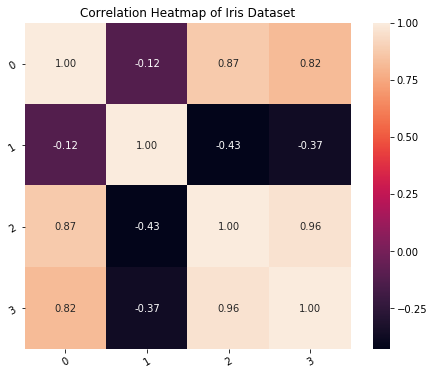

In [39]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    


In [40]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [42]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

[2, 3]


In [43]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)


       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
..   ...  ...
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]


# **3. Wrapper Methods** 


- В методах-обертках мы пытаемся использовать подмножество признаков и обучаем модель с их помощью. На основе выводов, которые мы делаем из предыдущей модели, мы решаем добавить или удалить признаки из подмножества. По сути, проблема сводится к проблеме поиска. Эти методы обычно очень дороги в вычислительном отношении.

- Некоторые распространенные примеры "оберточных" методов 

  - 1. Forward selection, 
  - 2. Backward elimination, 
  - 3. Exhaustive feature selection,
  - 4. Recursive feature elimination.
  - 5. Recursive feature elimination with cross-validation
  
- Методы обёртывания можно пояснить с помощью следующего графика:


![Wrapper Methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)


## **3.1 Forward Selection** 


- Форвардный отбор - это итерационный метод, в котором мы начинаем с отсутствия признака в модели. На каждой итерации мы добавляем признак, который лучше всего улучшает нашу модель, пока добавление новой переменной не улучшит производительность модели.

- Процедура начинается с пустого набора признаков [сокращенное множество]. Определяется лучший из исходных признаков и добавляется к сокращенному набору. На каждой последующей итерации к этому набору добавляется лучший из оставшихся исходных признаков.

- Пошаговый выбор признаков начинается с оценки всех признаков по отдельности и выбирается тот, который генерирует алгоритм с наилучшей производительностью, в соответствии с заранее заданными критериями оценки. На втором этапе оцениваются все возможные комбинации выбранного признака и второго признака и выбирается пара, которая создает алгоритм с наилучшими показателями, основываясь на тех же заданных критериях.

- Предварительно заданными критериями могут быть, например, roc_auc для классификации и R-squared для регрессии.

- Эта процедура выбора называется жадной, поскольку она оценивает все возможные комбинации признаков: одиночные, двойные, тройные и так далее. Поэтому она требует значительных вычислительных затрат, а иногда, если пространство признаков велико, даже невыполнима.

- Существует специальный пакет для python, который реализует этот тип выбора признаков: mlxtend.

- В реализации mlxtend для пошагового выбора признаков критерием остановки является произвольно заданное количество признаков. Таким образом, поиск будет завершен, когда мы достигнем желаемого количества отобранных признаков.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [71]:
#загрузим наши данные
data = pd.read_csv('input/house_price/train.csv')
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
# На практике выбор признаков должен осуществляться после предварительной обработки данных,
# поэтому в идеале все категориальные переменные кодируются в числа,
# и тогда вы сможете оценить, насколько они детерминируют цель.
# выбираем числовые столбцы:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [73]:
# разделиим данные
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [74]:
# найдем скоррелированные фичи
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )


correlated features:  4


In [75]:
corr_matrix = X_train.corr()
print(corr_matrix)

  


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.003944    -0.007151 -0.039824    -0.034883   
MSSubClass     0.003944    1.000000    -0.370998 -0.119985     0.035319   
LotFrontage   -0.007151   -0.370998     1.000000  0.431762     0.257280   
LotArea       -0.039824   -0.119985     0.431762  1.000000     0.101284   
OverallQual   -0.034883    0.035319     0.257280  0.101284     1.000000   
OverallCond    0.019085   -0.045026    -0.043256  0.007795    -0.072643   
YearBuilt     -0.030466    0.003979     0.119127  0.007051     0.555663   
YearRemodAdd  -0.042373    0.033972     0.105066  0.018940     0.545434   
MasVnrArea    -0.020878   -0.012850     0.219106  0.121015     0.426216   
BsmtFinSF1    -0.014430   -0.076315     0.258037  0.225667     0.216694   
BsmtFinSF2    -0.013619   -0.067563     0.080032  0.132488    -0.058417   
BsmtUnfSF      0.000002   -0.140352     0.118611 -0.012354     0.333993   
TotalBsmtSF   -0.019436  

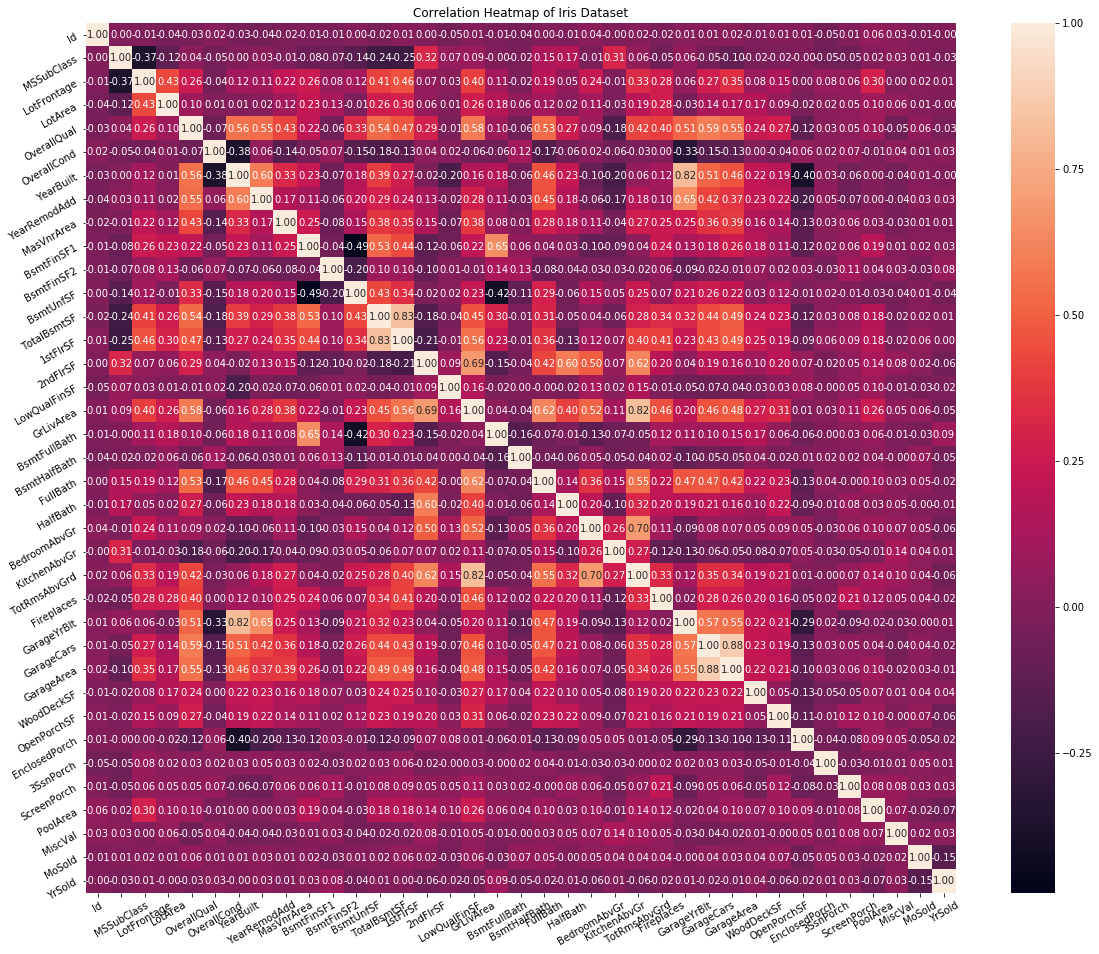

In [57]:
# Create correlation heatmap
corr_matrix
plt.figure(figsize=(20, 16))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [76]:
# и удалим их
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

In [59]:
X_train.fillna(0, inplace=True)

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   11.3s finished

[2021-06-02 13:23:46] Features: 1/10 -- score: 0.663372807075266[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.0s finished

[2021-06-02 13:23:58] Features: 2/10 -- score: 0.719565797781066[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   16.8s finished

[2021-06-02 13:24:15] Features: 3/10 -- score: 0.7979164731189297[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [61]:
sfs1.k_feature_idx_

(1, 4, 5, 6, 9, 14, 15, 20, 27, 30)

In [62]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', '3SsnPorch', 'MiscVal'],
      dtype='object')

- Мы видим, что в результате прямого отбора признаков из всех заданных столбцов выбираются вышеуказанные столбцы.

## **3.2 Backward Elimination** 


- При обратном исключении мы начинаем со всех признаков и на каждой итерации удаляем наименее значимый признак, что улучшает производительность модели. Мы повторяем это до тех пор, пока не будет наблюдаться улучшение при удалении признаков.

- Процедура начинается с полного набора признаков. На каждом шаге удаляется худший признак, оставшийся в наборе.


In [63]:
# step backward feature elimination

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   56.8s finished

[2021-06-02 13:29:11] Features: 32/10 -- score: 0.8374946788606449[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   54.6s finished

[2021-06-02 13:30:05] Features: 31/10 -- score: 0.8385643051888948[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   51.1s finished

[2021-06-02 13:30:56] Features: 30/10 -- score: 0.8399425020208335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [64]:
sfs1.k_feature_idx_

(3, 4, 5, 6, 9, 12, 15, 21, 23, 28)

In [65]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars',
       'ScreenPorch'],
      dtype='object')

In [ ]:
Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', '3SsnPorch', 'MiscVal'],
      dtype='object')

- Таким образом, обратное исключение признаков приводит к выбору следующих столбцов.

## **3.3 Exhaustive Feature Selection**


- При исчерпывающем выборе признаков выбирается наилучшее подмножество признаков из всех возможных подмножеств признаков путем оптимизации заданной метрики производительности для определенного алгоритма машинного обучении. Например, если классификатором является логистическая регрессия, а набор данных состоит из 4 признаков, алгоритм будет оценивать все 15 комбинаций признаков следующим образом:

  - все возможные комбинации 1 признака
  - все возможные комбинации 2 признаков
  - все возможные комбинации 3 признаков
  - все 4 признака
  
  
и выбирает ту, которая приводит к наилучшей производительности (например, точности классификации) классификатора логистической регрессии.

- Это еще один жадный алгоритм, поскольку он оценивает все возможные комбинации признаков. Он достаточно дорог в вычислениях, а иногда, если пространство признаков велико, даже невыполним.

- Существует специальный пакет для python, который реализует этот тип отбора признаков: mlxtend.

- В реализации mlxtend для исчерпывающего выбора признаков критерием остановки является произвольно заданное количество признаков. Таким образом, поиск будет завершен, когда мы достигнем желаемого количества отобранных признаков.

- Это несколько произвольно, поскольку мы можем выбрать неоптимальное количество признаков или, наоборот, большое количество признаков.

## **3.4 Recursive Feature elimination** 


- Это жадный алгоритм оптимизации, целью которого является поиск подмножества признаков с наилучшими показателями. Он многократно создает модели и на каждой итерации откладывает в сторону лучший или худший признак. Он строит следующую модель с оставленными признаками, пока все признаки не будут исчерпаны. Затем признаки ранжируются в порядке их исключения.

- Рекурсивное исключение признаков выполняет жадный поиск для нахождения подмножества признаков с наилучшими показателями. Он итеративно создает модели и на каждой итерации определяет лучший или худший признак. Последующие модели строятся с оставленными признаками, пока не будут изучены все признаки. Затем он ранжирует признаки в порядке их исключения. В худшем случае, если набор данных содержит N признаков, RFE проведет жадный поиск 2N комбинаций признаков.

- Источник :  https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py

## **3.5 Recursive Feature Elimination with Cross-Validation** 


- Метод **рекурсивного исключения признаков с перекрестной валидацией (RFECV)** выбирает лучшее подмножество признаков для оценщика путем итеративного удаления от 0 до N признаков с помощью рекурсивного исключения признаков.

- Затем он выбирает лучшее подмножество на основе точности или оценки кросс-валидации или roc-auc модели. Метод рекурсивного устранения признаков позволяет устранить n признаков из модели путем многократного подбора модели и на каждом шаге удаления самых слабых признаков.

- Источник : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

# **4. Embedded Methods**


- Встроенные методы являются итерационными в том смысле, что они учитывают каждую итерацию процесса обучения модели и тщательно извлекают те признаки, которые вносят наибольший вклад в обучение на конкретной итерации. Методы регуляризации - это наиболее часто используемые встроенные методы, которые наказывают признак, заданный пороговым значением коэффициента.

- Именно поэтому методы регуляризации также называют методами пенализации, которые вводят дополнительные ограничения в оптимизацию алгоритма прогнозирования (например, алгоритма регрессии), которые смещают модель в сторону меньшей сложности (меньшего количества коэффициентов).

- Одними из наиболее популярных примеров таких методов являются регрессия LASSO и RIDGE, которые имеют встроенные функции пенализации для уменьшения избыточной подгонки.

- Встроенные методы можно объяснить с помощью следующего графика:


![Embedded Methods](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png)



## **4.1 LASSO Regression**

- Регрессия Лассо выполняет регуляризацию L1, которая добавляет штраф, эквивалентный абсолютному значению величины коэффициентов.

- Регуляризация заключается в добавлении штрафа к различным параметрам модели машинного обучения, чтобы уменьшить свободу модели и, другими словами, избежать перебора. При регуляризации линейной модели штраф применяется к коэффициентам, умножающим каждый из предикторов. Из различных типов регуляризации Lasso или l1 обладает свойством уменьшать некоторые коэффициенты до нуля. Таким образом, этот признак может быть удален из модели.


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [77]:
# загрузим данные
data = pd.read_csv('input/house_price/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# На практике выбор признаков должен осуществляться после предварительной обработки данных,
# поэтому в идеале все категориальные переменные кодируются в числа,
# и тогда вы сможете оценить, насколько они детерминируют целевую переменную
# выбираем числовые столбцы:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [79]:
# разделим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [82]:
#стандартизируем наши данные

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [83]:
# имейте в виду, что объект линейной регрессии из sklearn не
# не позволяет проводить регуляризацию. Поэтому если вы хотите сделать регуляризированную
# линейную регрессию, вам нужно импортировать именно "Lasso".
# это l1-версия линейной регрессии.
# alpha - это пенализация,установим ее высокой, чтобы
# чтобы заставить алгоритм уменьшить некоторые коэффициенты

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [73]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [74]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 37
selected features: 33
features with coefficients shrank to zero: 4


In [77]:
X_train.columns[(sel_.get_support()) == False]

Index(['BsmtUnfSF', '1stFlrSF', 'GarageArea', 'MoSold'], dtype='object')

- Мы видим, что регуляризация Лассо помогает удалить из набора данных несущественные признаки. Поэтому увеличение пенализации приведет к увеличению числа удаляемых признаков. Поэтому нам нужно следить за тем, чтобы не установить слишком высокий штраф, чтобы не удалить даже важные признаки, или слишком низкий, чтобы не удалить неважные признаки.

- Если штраф слишком высок и удаляются важные признаки, мы заметим падение производительности алгоритма и тогда поймем, что нужно уменьшить регуляризацию.

## **4.2 Random Forest Importance**

- Случайные леса - один из самых популярных алгоритмов машинного обучения. Они пользуются таким успехом, потому что в целом обеспечивают хорошую предсказательную эффективность, низкий уровень переоценки и легкую интерпретируемость. Эта интерпретируемость обеспечивается тем, что можно легко вывести важность каждой переменной для решения дерева. Другими словами, легко вычислить, какой вклад вносит каждая переменная в решение.

- Случайные леса состоят из 4-12 сотен деревьев решений, каждое из которых построено на основе случайного извлечения наблюдений из набора данных и случайного извлечения признаков. Не каждое дерево видит все признаки или все наблюдения, и это гарантирует, что деревья декоррелированы и, следовательно, менее склонны к чрезмерной подгонке. Каждое дерево также представляет собой последовательность вопросов "да-нет", основанных на одном или комбинации признаков. В каждом узле (то есть в каждом вопросе) тройка делит набор данных на 2 ведра, каждое из которых содержит наблюдения, более похожие между собой и отличающиеся от наблюдений в другом ведре. Таким образом, важность каждого признака определяется тем, насколько "чистым" является каждое из ведер.

- Для классификации мерой эффективности является либо Gini, либо прирост информации (энтропия). Для регрессии мерой  эффективности является дисперсия. Поэтому при обучении дерева можно вычислить, насколько каждый признак уменьшает параметр, поставленный во главу угла. Чем больше признак уменьшает такой параметр, тем важнее этот признак. В случайных лесах уменьшение  каждого признака может быть усреднено по деревьям для определения окончательной важности переменной.

- Для лучшего понимания, признаки, выбранные в вершинах деревьев, в целом более важны, чем признаки, выбранные в конечных узлах деревьев, так как обычно верхние расщепления приводят к большему приросту информации.

In [2]:
# загрузим все библиотеки
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [5]:
# загрузим данные
mush = pd.read_csv('input/mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Уберем информацию о принадлежности к классам
X = mush.drop(['class'], axis = 1)
y = mush['class']

In [7]:
# Перекодируем категориальные переменные
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

X.head

<bound method NDFrame.head of       cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8119            0            0            0            1            0   
8120            0            0            0            0            0   
8121            0            0            1            0            0   
8122            0            0            0            1            0   
8123            0            0            0            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0           

In [9]:
# Разделим датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

ValueError: could not convert string to float: 'x'

In [10]:
# Сделаем классификатор
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [11]:
# Fit
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
# Predict
y_pred = clf.predict(X_test)

#### **Feature Importance**

- Модели деревьев решений, основанные на ансамблях (например, Extra Trees и Random Forest), можно использовать для ранжирования важности различных признаков. Знание того, каким признакам наша модель придает наибольшее значение, может быть очень важным для понимания того, как наша модель делает свои предсказания (следовательно, делает ее более объяснимой). В то же время мы можем избавиться от тех признаков, которые не приносят пользы нашей модели.

<AxesSubplot:>

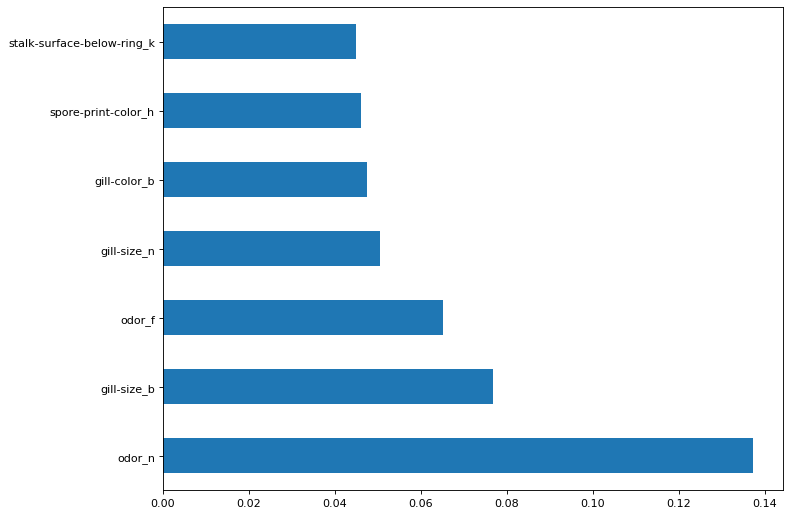

In [15]:
# Давайте визуализируем, какие же фичи самые важные:

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

In [89]:
clf.feature_importances_

array([1.85646454e-03, 1.70274269e-04, 6.22618684e-04, 6.26450423e-04,
       4.67271614e-04, 8.79812803e-04, 3.88511380e-03, 1.70492198e-04,
       7.35739875e-03, 2.59546785e-03, 2.10246931e-03, 9.20140291e-04,
       6.01969751e-04, 7.63928366e-04, 2.03754555e-03, 7.24863347e-04,
       4.40932584e-04, 2.37148717e-04, 1.48923092e-03, 3.19940159e-03,
       2.79874952e-02, 1.79358316e-02, 5.84447543e-03, 8.84949895e-03,
       6.50624447e-02, 2.65216459e-03, 1.03502529e-03, 1.37242136e-01,
       1.26039351e-02, 4.33464859e-03, 4.17511582e-03, 1.78658757e-03,
       6.94720799e-04, 1.12581527e-02, 1.20216432e-02, 7.67414147e-02,
       5.04913379e-02, 4.73505473e-02, 8.30347123e-06, 1.23903820e-03,
       6.46958037e-04, 7.34554517e-05, 1.05536752e-03, 0.00000000e+00,
       4.23320442e-04, 1.57484912e-03, 1.11345039e-03, 1.87802891e-03,
       2.71782671e-04, 9.56150251e-03, 1.11755838e-02, 1.23485109e-02,
       2.11559795e-02, 6.31192823e-03, 1.14474439e-02, 5.12699184e-04,
      

- Теперь мы знаем, какие признаки наиболее важны в модели Random Forest, мы можем обучать нашу модель только на этих признаках. 

# **5. Как выбрать правильный метод отбора признаков**


- Мы видим, что существует множество методов отбора признаков. 

- Следующий график послужит руководством по выбору метода отбора признаков:-...

![How to Choose a Feature Selection Method](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)


## **Что можно выбрать**

##  Числовой вход, числовой выход.

- Это задача регрессионного прогнозного моделирования с числовыми входными переменными.

- Наиболее распространенными методами является использование коэффициента корреляции, например, коэффициента Пирсона для линейной корреляции, или ранговых методов для нелинейной корреляции.

- Используются следующие тесты:-

  - Коэффициент корреляции Пирсона (линейный).
  - Ранговый коэффициент Спирмена (нелинейный).
  
  
## Числовой вход, категориальный выход

- Это задача классификационного прогнозного моделирования с числовыми входными переменными.

- Это, возможно, самый распространенный пример проблемы классификации,

- Опять же, наиболее распространенные методы основаны на корреляции, хотя в этом случае они должны учитывать категориальную цель.

- Мы можем использовать следующие тесты:-

  - Коэффициент корреляции ANOVA (линейный).
  - Ранговый коэффициент Кендалла (нелинейный).
  
- Кендалл предполагает, что категориальная переменная является порядковой.


## **Категориальный вход, числовой выход**.

- Это проблема регрессионного прогнозного моделирования с категориальными входными переменными.

- Это странный пример регрессионной задачи (например, мы не будем сталкиваться с ней часто).

- Мы можем использовать те же методы "Числовой вход, категориальный выход" (описанные выше), но в обратном порядке.




## **Категориальный вход, категориальный выход**.

- Это задача классификационного прогнозного моделирования с категориальными входными переменными.

- Наиболее распространенной мерой корреляции для категориальных данных является тест хи-квадрат. Мы также можем использовать взаимную информацию (прирост информации) из области теории информации.

- В данном случае могут быть использованы следующие тесты -

  - Тест хи-квадрат (таблицы случайности).
  - Взаимная информация.
  
На самом деле, взаимная информация - это мощный метод, который может оказаться полезным как для категориальных, так и для числовых данных, т.е. он не зависит от типов данных.

# **6. Советы и рекомендации по выбору признаков**


## **Корреляционная статистика**

- Библиотека scikit-learn предоставляет реализацию большинства полезных статистических мер.

- Например:

   - Коэффициент корреляции Пирсона: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
   - ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
   - Хи-квадрат: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
   - Взаимная информация: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) и [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).
   
   
- Кроме того, библиотека SciPy предоставляет реализацию многих других статистик, таких как корреляция Кенделла (kendalltau) и ранговая корреляция Спирмена (spearmanr).


## **Методы отбора**

- Библиотека scikit-learn также предоставляет множество различных методов фильтрации после вычисления статистики для каждой входной переменной с целью.

- Два наиболее популярных метода включают:

    - Выбрать k лучших переменных: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
    - Выбор переменных с наивысшим перцентилем: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)
    


## **Преобразование переменных**

- Мы можем рассмотреть возможность преобразования переменных, чтобы получить доступ к различным статистическим методам. Например, мы можем преобразовать категориальную переменную в порядковую, даже если она таковой не является, и посмотреть, появятся ли интересные результаты.

- Мы также можем сделать числовую переменную дискретной (например, бины); попробуйте меры, основанные на категориях.

- Некоторые статистические меры предполагают свойства переменных, например, критерий Пирсона, который предполагает гауссовское распределение вероятности для наблюдений и линейную зависимость. Вы можете преобразовать данные, чтобы они соответствовали ожиданиям теста, а также попробовать провести тест независимо от ожиданий и сравнить результаты.


## **Какой метод лучше?

- Лучшего метода отбора признаков не существует. Точно так же, как не существует лучшего набора входных переменных или лучшего алгоритма машинного обучения. 

- Вместо этого мы должны определить, что лучше всего подходит для вашей конкретной проблемы, используя тщательные систематические эксперименты.

- Мы должны попробовать ряд различных моделей, построенных на различных подмножествах признаков, отобранных с помощью различных статистических мер, и выяснить, что лучше всего работает для вашей конкретной проблемы.


## **4 лучших способа отбора признаков**

- Ниже перечислены 4 практических способа отбора признаков, которые дают наилучшие результаты.

    1. Выбрать лучший
    2. Рекурсивное исключение признаков
    3. Корреляционная матрица с тепловой картой
    4. Важность случайного леса

#### Boruta

Boruta работает, используя случайность еще больше. Вот алгоритм:

1. Расширить информационную систему, добавив копии всех переменных (информационная система всегда расширяется как минимум на 5 теневых атрибутов, даже если число атрибутов в исходном наборе меньше 5).
2. Перемешайте добавленные атрибуты, чтобы удалить их корреляции с ответом.
3.  Запустите классификатор случайного леса на расширенной информационной системе и соберите вычисленные Z-оценки.
4.  Найдите максимальную оценку Z среди теневых атрибутов (MZSA), а затем присвойте "хит" каждому атрибуту, который получил оценку выше, чем MZSA.
5.   Для каждого атрибута с неопределенной важностью проведите двусторонний тест на равенство с MZSA.
6.   Признайте атрибуты, важность которых значительно ниже MZSA, "неважными" и навсегда удалите их из информационной системы.
7.   Считать атрибуты, важность которых значительно выше MZSA, "важными".
8.  Удалите все теневые атрибуты.
9.  Повторяйте процедуру до тех пор, пока не будет определена важность всех атрибутов, или пока алгоритм не достигнет ранее установленного предела количества запусков случайного леса.




In [16]:
from __future__ import print_function

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

def timer(start_time=None):
    if not start_time: 
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [17]:
train = pd.read_csv('results/train.csv', dtype={'target': np.int8, 'id': np.int32})
X = train.drop(['id','target'], axis=1).values
y = train['target'].values
tr_ids = train['id'].values
n_train = len(X)
test = pd.read_csv('results/test.csv', dtype={'id': np.int32})
X_test = test.drop(['id'], axis=1).values
te_ids = test['id'].values

In [18]:
train.

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	57
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	13 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	14 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	15 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	30
Iteration: 	16 / 100
Confirmed: 	24
Tentative: 	3
Reject

In [31]:
print ('\n Initial features: ', train.drop(['id','target'], axis=1).columns.tolist() )

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)

feature_df = pd.DataFrame(train.drop(['id','target'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))
feature_df.to_csv('boruta-feature-ranking.csv', index=False)

# check ranking of features
print ('\n Feature ranking:')
print (boruta_selector.ranking_)


selected = train.drop(['id','target'], axis=1).columns[boruta_selector.support_]
train = train[selected]
train['id'] = tr_ids
train['target'] = y
train = train.set_index('id')
train.to_csv('train_boruta_filtered.csv', index_label='id')
test = test[selected]
test['id'] = te_ids
test = test.set_index('id')
test.to_csv('test_boruta_filtered.csv', index_label='id')




 Initial features:  ['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

 Number of selected features:
24

 Top 24 features:
         features  rank
0       ps_ind_0